<a href="https://colab.research.google.com/github/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/blob/main/08_nlp_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py

--2025-11-04 14:25:20--  https://raw.githubusercontent.com/FairozAhmadSheikh/DeepLearning_Bootcamp_with_Tensor_Flow/refs/heads/main/helper_functions/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6733 (6.6K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   6.58K  --.-KB/s    in 0s      

2025-11-04 14:25:20 (75.1 MB/s) - ‘helper_functions.py’ saved [6733/6733]



In [3]:
from helper_functions import unzip_data,plot_loss_curves,compare_historys,create_tensorboard_callback

In [4]:
# Get the Dataset from kaggle NLP with Disaster Tweets
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2025-11-04 14:25:41--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.180.207, 192.178.155.207, 192.178.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.180.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2025-11-04 14:25:42 (46.2 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
unzip_data("nlp_getting_started.zip")

In [6]:
# Become One with Dataset (Visualize)
import pandas as pd
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df['text'][1]

'Forest fire near La Ronge Sask. Canada'

In [8]:
train_df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [9]:
# Shuffle Dataset
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()


,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [10]:
# What does Test Dataset Look like
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [11]:
# How many examples of each classes
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [12]:
# How many Total Samples
len(train_df),len(test_df)

(7613, 3263)

# **Visualize some random training examples**

In [13]:
import random
random_index=random.randint(0,len(train_df)-5)
for row in train_df_shuffled[['text','target']][random_index:random_index+5].itertuples():
    _,text,target=row
    print(f'Target : {target} \n ',"(real disaster)" if target>0 else "not real disaster")
    print(f'Text : \n {text}')
    print('---\n')

Target : 0 
  not real disaster
Text : 
 Just burned the shit outta myself on my dirt bike ??
---

Target : 0 
  not real disaster
Text : 
 @FEVWarrior -in the Vault that could take a look at those wounds of yours if you'd like to go to one of these places first.' Zarry has had-
---

Target : 1 
  (real disaster)
Text : 
 Another Mechanical Mod Explosion: Man Injured When a 'Pharaoh' Mod Blows Up in His Hand - http://t.co/O82yVXbztv http://t.co/N5KmxuVeRg
---

Target : 0 
  not real disaster
Text : 
 Hellfire! We donÛªt even want to think about it or mention it so letÛªs not do anything that leads to it!
---

Target : 1 
  (real disaster)
Text : 
 Dramatic Video Shows Plane Landing During Violent Storm http://t.co/XRgPdlSWfD
---



In [14]:
#Splitting data into Train and Validation
from sklearn.model_selection import train_test_split

train_sentances,val_sentances,train_labels,val_labels=train_test_split(
                                                      train_df_shuffled['text'].to_numpy(),
                                                      train_df_shuffled['target'].to_numpy(),
                                                      test_size=0.1,
                                                      random_state=42)

In [15]:
# Check lengths
len(train_sentances),len(val_sentances),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

# **Convert Text into Numbers**

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
text_vectorizer=TextVectorization(
                                  max_tokens=10000, # Set max_tokens to a value
                                  standardize='lower_and_strip_punctuation',
                                  split='whitespace',
                                  ngrams=None,
                                  output_mode='int',
                                  output_sequence_length=None,
                                  pad_to_max_tokens=True,
                                   )

In [17]:
max_vocab_length=100   # Max number of words to have in vocabulary
max_length=15  # Max length our sequence will be
text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
                                  standardize='lower_and_strip_punctuation',
                                  split='whitespace',
                                  ngrams=None,
                                  output_mode='int',
                                  output_sequence_length=max_vocab_length,
                                  pad_to_max_tokens=True)

In [18]:
# Fit the Text Vectorizer
text_vectorizer.adapt(train_sentances)

In [19]:
# Create a sample sentance and tokenize it
sample_sentance=random.choice(train_sentances)
print(f' The Original Sentance \n {sample_sentance} \n The Text Vectorized Version \n')
text_vectorizer([sample_sentance])

 The Original Sentance 
 Lizard Wizard in a Blizzard #LWB http://t.co/MgR809yc5a 
 The Text Vectorized Version 



<tf.Tensor: shape=(1, 100), dtype=int64, numpy=
array([[1, 1, 4, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

In [20]:
# Get uniqe words in vocab
words_in_vocab=text_vectorizer.get_vocabulary()
top_5_words=words_in_vocab[:5]
bottom_5_words=words_in_vocab[-5:]
print(f'The Number of words in vocab are : {len(words_in_vocab)}')
print(f'The Five most common words in vocab are : {top_5_words}')
print(f'The Five least words in vocab are : {bottom_5_words}')

The Number of words in vocab are : 100
The Five most common words in vocab are : ['', '[UNK]', np.str_('the'), np.str_('a'), np.str_('in')]
The Five least words in vocab are : [np.str_('buildings'), np.str_('rt'), np.str_('first'), np.str_('cant'), np.str_('see')]


In [21]:
# Creating a embedding layer that turns text vectorized into the embeding vectors
from tensorflow.keras.layers import Embedding

embedding=Embedding(input_dim=max_vocab_length,
                    output_dim=128,
                    )

In [22]:
# Get Random Sentance from trainning set
random_sentance=random.choice(train_sentances)
print(f'Original Text \n {random_sentance}\n')
sample_embedding=embedding(text_vectorizer([random_sentance]))
sample_embedding

Original Text 
 Newberg upheaval: Jacque Betz responds 'looking forward to the day' she can answer questions #orcot #orpol http://t.co/dazQaMOO0C



<tf.Tensor: shape=(1, 100, 128), dtype=float32, numpy=
array([[[ 0.00790872,  0.0060757 ,  0.02818758, ...,  0.03338014,
          0.04774782,  0.03603169],
        [ 0.00790872,  0.0060757 ,  0.02818758, ...,  0.03338014,
          0.04774782,  0.03603169],
        [ 0.00790872,  0.0060757 ,  0.02818758, ...,  0.03338014,
          0.04774782,  0.03603169],
        ...,
        [-0.00383478, -0.01347697, -0.00394018, ..., -0.01774801,
         -0.00810555, -0.03458637],
        [-0.00383478, -0.01347697, -0.00394018, ..., -0.01774801,
         -0.00810555, -0.03458637],
        [-0.00383478, -0.01347697, -0.00394018, ..., -0.01774801,
         -0.00810555, -0.03458637]]], dtype=float32)>

# ***Lets Now Create our Baseline Model***
its common to use ML model first or non DL model and then switch to DL model

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0=Pipeline([
    ('tfid',TfidfVectorizer()),
    ('clf',MultinomialNB()),
])

model_0.fit(train_sentances,train_labels)
baseline_score=model_0.score(val_sentances,val_labels)

print(f'Our Baseline Model Acheives Accuracy of : {baseline_score*100:.2f}')

Our Baseline Model Acheives Accuracy of : 79.27


In [24]:
# Model Predictions
baseline_preds=model_0.predict(val_sentances)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

# **Creating an evaluation function**

In [25]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support


def calculate_results(y_true,y_pred):
  model_accuracy=accuracy_score(y_true=y_true,y_pred=y_pred)
  model_precission,model_recall,model_f1,_=precision_recall_fscore_support(y_true=y_true,y_pred=y_pred,average='weighted')

  model_results={
     "accuracy":model_accuracy,
     "precsion":model_precission,
     "recall":model_recall,
     'f1_score':model_f1
  }
  return model_results

In [26]:
# Get Baseline Results
baseline_results=calculate_results(y_true=val_labels,y_pred=baseline_preds)

baseline_results

{'accuracy': 0.7926509186351706,
 'precsion': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

# **Model1 : Feed Forward Neural Network ( Dense Model)**

In [27]:
from helper_functions import create_tensorboard_callback
from tensorflow.keras import layers

In [28]:
SAVE_DIR="ModelLogs"

inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GlobalAveragePooling1D()(x) # Add this layer to reduce dimensions
outputs=layers.Dense(1,activation='sigmoid')(x)
model_1=tf.keras.Model(inputs,outputs,name="model_1_Dense")
model_1.summary()

Model: "model_1_Dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 128)       │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_1_history=model_1.fit(train_sentances,train_labels,epochs=5,validation_data=(val_sentances,val_labels),callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,experiment_name='model_1_dense')])

Saving TensorBoard log files to: ModelLogs/model_1_dense/20251104-142543
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5836 - loss: 0.6811 - val_accuracy: 0.5604 - val_loss: 0.6774
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5908 - loss: 0.6688 - val_accuracy: 0.6207 - val_loss: 0.6633
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6033 - loss: 0.6622 - val_accuracy: 0.6457 - val_loss: 0.6426
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6330 - loss: 0.6413 - val_accuracy: 0.5827 - val_loss: 0.6584
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6586 - loss: 0.6156 - val_accuracy: 0.6732 - val_loss: 0.6117


In [30]:
model_1.evaluate(val_sentances,val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6566 - loss: 0.6265


[0.6116757988929749, 0.6732283234596252]

In [31]:
model_1_predict_probs=model_1.predict(val_sentances)
model_1_predict_probs

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


array([[0.5621947 ],
       [0.6733602 ],
       [0.7228445 ],
       [0.37000105],
       [0.4646724 ],
       [0.650783  ],
       [0.70903707],
       [0.66276956],
       [0.68034005],
       [0.3144295 ],
       [0.48822105],
       [0.5527267 ],
       [0.59418225],
       [0.47223398],
       [0.638115  ],
       [0.51693064],
       [0.28470507],
       [0.39880604],
       [0.45016116],
       [0.5368425 ],
       [0.27797803],
       [0.1518242 ],
       [0.41882962],
       [0.48294428],
       [0.520149  ],
       [0.62194693],
       [0.167513  ],
       [0.5609622 ],
       [0.2630701 ],
       [0.32354915],
       [0.47836864],
       [0.48754263],
       [0.5464043 ],
       [0.4763854 ],
       [0.5462761 ],
       [0.1856824 ],
       [0.65405256],
       [0.30997065],
       [0.28621408],
       [0.6816724 ],
       [0.3947973 ],
       [0.6054874 ],
       [0.41331044],
       [0.54304737],
       [0.3723546 ],
       [0.6058247 ],
       [0.4748928 ],
       [0.742

In [32]:
model_1_predict_probs.shape

(762, 1)

In [33]:
model_1_predict_probs[0]

array([0.5621947], dtype=float32)

In [34]:
# Make the preictions comaparable with the actaul labels
model_1_predict_probs=tf.squeeze(tf.round(model_1_predict_probs))
model_1_predict_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [35]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

# ***Calculate Model Results***

In [36]:
model_1_results=calculate_results(y_true=val_labels,y_pred=model_1_predict_probs)
model_1_results

{'accuracy': 0.6732283464566929,
 'precsion': 0.6763866055204638,
 'recall': 0.6732283464566929,
 'f1_score': 0.6738336306209534}

In [37]:
import numpy as np
np.array(list(model_1_results.values()))>np.array(list(baseline_results.values()))

array([False, False, False, False])

# ***Lets Visualize the embedding that Model learned using Tensorflow Projector***

In [38]:
words_in_vocab=text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:10]

(100,
 ['',
  '[UNK]',
  np.str_('the'),
  np.str_('a'),
  np.str_('in'),
  np.str_('to'),
  np.str_('of'),
  np.str_('and'),
  np.str_('i'),
  np.str_('is')])

In [39]:
model_1.summary()

Model: "model_1_Dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 128)       │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,789 (151.52 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,860 (101.02 KB)

In [40]:
embed_weights=model_1.get_layer('embedding').get_weights()[0]
embed_weights,print(embed_weights.shape)

(100, 128)


(array([[ 0.00255791, -0.00462159, -0.01299549, ..., -0.03120974,
         -0.01330099,  0.01256142],
        [-0.17565158,  0.1887748 ,  0.22062977, ...,  0.22720179,
          0.25190547,  0.02196975],
        [ 0.2493429 , -0.20068659, -0.15572418, ..., -0.18849958,
         -0.20216769, -0.15061525],
        ...,
        [-0.05123549,  0.00155856,  0.00399678, ...,  0.02385271,
          0.04670033,  0.05543165],
        [ 0.39289606, -0.45789608, -0.41576242, ..., -0.31127152,
         -0.36844242, -0.20456213],
        [ 0.3485927 , -0.3198743 , -0.29503134, ..., -0.226637  ,
         -0.3210136 , -0.21053162]], dtype=float32),
 None)

Write the weights to disk. To use the Embedding Projector, you will upload two files in tab separated format: a file of vectors (containing the embedding), and a file of meta data (containing the words).  This code is from the tensorflow documentation Here[https://www.tensorflow.org/text/guide/word_embeddings]

In [41]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [42]:
# After this download step use projector tensorflow to visualzize it
"""
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass
"""


"\ntry:\n  from google.colab import files\n  files.download('vectors.tsv')\n  files.download('metadata.tsv')\nexcept Exception:\n  pass\n"

# ***MODEL2 =  LSTM [LONG SHORT TERM MEMORY]***

In [43]:
from tensorflow.keras import layers


In [44]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.LSTM(64,return_sequences=True)(x)
x=layers.LSTM(64)(x)
x=layers.Dense(64,activation='relu')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_2=tf.keras.Model(inputs,outputs)

In [45]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [46]:
model_2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 128)       │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,457 (388.50 KB)

 Trainable params: 99,457 (388.50 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model_2_history=model_2.fit(train_sentances,train_labels,epochs=5,validation_data=(val_sentances,val_labels),callbacks=[create_tensorboard_callback(SAVE_DIR,"model_2_LSTM")])

Saving TensorBoard log files to: ModelLogs/model_2_LSTM/20251104-142603
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 34s 124ms/step - accuracy: 0.5700 - loss: 0.6856 - val_accuracy: 0.5433 - val_loss: 0.6898
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 27s 124ms/step - accuracy: 0.5647 - loss: 0.6853 - val_accuracy: 0.5433 - val_loss: 0.6902
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 123ms/step - accuracy: 0.5735 - loss: 0.6831 - val_accuracy: 0.5433 - val_loss: 0.6907
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 27s 125ms/step - accuracy: 0.5765 - loss: 0.6818 - val_accuracy: 0.5433 - val_loss: 0.6910
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 26s 121ms/step - accuracy: 0.5763 - loss: 0.6818 - val_accuracy: 0.5433 - val_loss: 0.6910


In [48]:
model_2_pred_probs=model_2.predict(val_sentances)
model_2_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


array([[0.42812368],
       [0.42812368],
       [0.42812368],
       [0.4281237 ],
       [0.42812368],
       [0.42812368],
       [0.42812368],
       [0.42812368],
       [0.42812368],
       [0.42812368]], dtype=float32)

In [49]:
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [50]:
model_2_results=calculate_results(y_true=val_labels,y_pred=model_2_preds)
model_2_results

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.5433070866141733,
 'precsion': 0.29518259036518074,
 'recall': 0.5433070866141733,
 'f1_score': 0.38253254057528524}

In [51]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precsion': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

# ***As it is clear our baseline is more accurate***

# ***Model_3 GRU (Gated Recurrent Unit)***

In [52]:
from tensorflow.keras import layers

inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GRU(64)(x)
x=layers.Dense(64,activation='relu')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_3=tf.keras.Model(inputs,outputs)


In [53]:
model_3.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 128)       │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,273 (212.00 KB)

 Trainable params: 54,273 (212.00 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [55]:
model_3_history=model_3.fit(train_sentances,train_labels,epochs=5,validation_data=(val_sentances,val_labels),callbacks=[create_tensorboard_callback(SAVE_DIR,"model_GRU")])

Saving TensorBoard log files to: ModelLogs/model_GRU/20251104-142855
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.5574 - loss: 0.6861 - val_accuracy: 0.5433 - val_loss: 0.6996
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 79ms/step - accuracy: 0.5663 - loss: 0.6856 - val_accuracy: 0.5433 - val_loss: 0.6913
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.5758 - loss: 0.6830 - val_accuracy: 0.5433 - val_loss: 0.6894
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - accuracy: 0.5778 - loss: 0.6821 - val_accuracy: 0.5433 - val_loss: 0.6907
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.5686 - loss: 0.6843 - val_accuracy: 0.5433 - val_loss: 0.6903


In [56]:
model_3_pred_probs=model_3.predict(val_sentances)
model_3_pred_probs

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


array([[0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.43547633],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.4354764 ],
       [0.435

In [57]:
model_3_pred=tf.squeeze(tf.round(model_3_pred_probs))
model_3_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [58]:
model_3_results=calculate_results(val_labels,model_3_pred)
model_3_results

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.5433070866141733,
 'precsion': 0.29518259036518074,
 'recall': 0.5433070866141733,
 'f1_score': 0.38253254057528524}

# ***GRU Does not beat the baseline***
lets try something else

# ***Model_4 Bidirectional Model***

In [59]:
from tensorflow.keras import layers

inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Bidirectional(layers.LSTM(64))(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_4=tf.keras.Model(inputs,outputs)

model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_4.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 128)       │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,745 (436.50 KB)

 Trainable params: 111,745 (436.50 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model_4_history=model_4.fit(train_sentances,train_labels,epochs=5,validation_data=(val_sentances,val_labels),callbacks=[create_tensorboard_callback(SAVE_DIR,"model_4_bi_directional")])

Saving TensorBoard log files to: ModelLogs/model_4_bi_directional/20251104-143034
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 31s 129ms/step - accuracy: 0.6873 - loss: 0.5981 - val_accuracy: 0.6824 - val_loss: 0.6292
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 27s 128ms/step - accuracy: 0.7081 - loss: 0.5684 - val_accuracy: 0.6798 - val_loss: 0.5877
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.7139 - loss: 0.5602 - val_accuracy: 0.6850 - val_loss: 0.5957
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.7285 - loss: 0.5398 - val_accuracy: 0.6982 - val_loss: 0.5813
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 28s 129ms/step - accuracy: 0.7230 - loss: 0.5487 - val_accuracy: 0.6942 - val_loss: 0.5803


In [61]:
model_4_pred_probs=model_4.predict(val_sentances)
model_4_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


array([[0.5698485 ],
       [0.8104997 ],
       [0.7682825 ],
       [0.17617193],
       [0.31885132],
       [0.81970346],
       [0.80034375],
       [0.76633507],
       [0.8683186 ],
       [0.10353254]], dtype=float32)

In [62]:
model_4_pred=tf.squeeze(tf.round(model_4_pred_probs))
model_4_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [63]:
model_4_results=calculate_results(val_labels,model_4_pred)

In [64]:
model_4_results

{'accuracy': 0.6942257217847769,
 'precsion': 0.6935247911088205,
 'recall': 0.6942257217847769,
 'f1_score': 0.6920275056626123}

# ***Still Not enough to beat the baseline***

**1D Convolutional Neural Network**

In [65]:
from tensorflow.keras import layers

inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Conv1D(filters=64,kernel_size=5,strides=1,activation='relu',padding='valid')(x)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_5=tf.keras.Model(inputs,outputs,name='Model_5_Conv1D')

In [66]:
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [67]:
model_5_history=model_5.fit(train_sentances,train_labels,epochs=5,validation_data=(val_sentances,val_labels))

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.6922 - loss: 0.5986 - val_accuracy: 0.6955 - val_loss: 0.6559
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.7099 - loss: 0.5766 - val_accuracy: 0.6562 - val_loss: 0.6810
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.7172 - loss: 0.5718 - val_accuracy: 0.7047 - val_loss: 0.5863
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7313 - loss: 0.5448 - val_accuracy: 0.7192 - val_loss: 0.5775
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.7357 - loss: 0.5310 - val_accuracy: 0.7100 - val_loss: 0.5839


In [68]:
model_5_pred_probs=model_5.predict(val_sentances)
model_5_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.42620108],
       [0.605673  ],
       [0.65540034],
       [0.19508757],
       [0.35605007],
       [0.7281177 ],
       [0.9632014 ],
       [0.80939317],
       [0.72979635],
       [0.07281835]], dtype=float32)

In [69]:
model_5_pred=tf.squeeze(tf.round(model_5_pred_probs))
model_5_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [70]:
model_5_results=calculate_results(val_labels,model_5_pred)
model_5_results

{'accuracy': 0.7099737532808399,
 'precsion': 0.7273159633800652,
 'recall': 0.7099737532808399,
 'f1_score': 0.6972489325186418}

# **Still does not beat the Baseline**
 Lets try a pretrained  model from tensorflow hub
 Using *USE: Unviversal Sentence Encoder*

In [71]:
import tensorflow_hub as hub
embed=hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

In [72]:
model_url='https://tfhub.dev/google/universal-sentence-encoder/4'

In [73]:
embed_samples=embed([sample_sentance])
print(embed_samples[0][:50])

tf.Tensor(
[-0.00976421  0.02947421 -0.05531136 -0.00784531  0.04642867 -0.03380974
  0.01852353  0.00116102 -0.05214373  0.01008321  0.08156278 -0.02495894
 -0.04687976 -0.01133082 -0.02849665  0.01576362  0.0621195   0.01573467
  0.01924798 -0.04276549 -0.00438606  0.02822503 -0.01097552  0.00767135
  0.02488416 -0.04948832 -0.0344153  -0.02298214 -0.00091404 -0.05940453
 -0.06314423  0.06158817  0.01014138  0.06123054  0.07127637  0.07378701
 -0.07196942  0.02573702 -0.0631806  -0.06172956  0.00879254  0.02370994
  0.03261743 -0.02372075 -0.07469339  0.06551172 -0.02249994  0.01464839
  0.03526299 -0.04982903], shape=(50,), dtype=float32)


In [74]:
sentence_encoder_layer=hub.KerasLayer(model_url,input_shape=[],dtype=tf.string,trainable=False,
                                      name='Universal_sentence_enocoder')

In [75]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, Model
import numpy as np


# 1. Fix for TensorFlow-Hub + Keras 3 incompatibility

class USEEncoder(layers.Layer):
    def __init__(self, model_url, trainable=False, **kwargs):
        super().__init__(**kwargs)
        self.use_layer = hub.load(model_url)
        self.trainable = trainable

    def call(self, inputs):
        return self.use_layer(inputs)





In [76]:
# 2. Load the Universal Sentence Encoder

print("Loading Universal Sentence Encoder (this may take a few seconds)...")
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_layer = USEEncoder(model_url)




Loading Universal Sentence Encoder (this may take a few seconds)...


In [77]:
# Build Model
inputs = layers.Input(shape=(), dtype=tf.string, name="input_text")
embeddings = use_layer(inputs)
x = layers.Dense(256, activation="relu")(embeddings)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_6= Model(inputs=inputs, outputs=outputs, name="USE_Sentiment_Model")

In [78]:
# compile
model_6.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [79]:
# Train
print("\nTraining model...\n")
model_6_history=model_6.fit(train_sentances, train_labels, epochs=5, batch_size=2, verbose=1)


Training model...

Epoch 1/5
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.7771 - loss: 0.4744
Epoch 2/5
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8348 - loss: 0.3823
Epoch 3/5
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.8508 - loss: 0.3523
Epoch 4/5
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.8732 - loss: 0.2854
Epoch 5/5
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.8984 - loss: 0.2401


In [80]:
#  Predict
print("\nEvaluating on validation sentences...\n")
model_6_predictions = model_6.predict(val_sentances)

for sent, pred in zip(val_sentances, model_6_predictions):
    label = "Positive 😊" if pred > 0.5 else "Negative 😞"
    print(f"Sentence: {sent}\nPrediction: {label} (score: {pred[0]:.4f})\n")


Evaluating on validation sentences...

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Sentence: DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5
Prediction: Negative 😞 (score: 0.0634)

Sentence: FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday
Prediction: Positive 😊 (score: 0.8387)

Sentence: Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj
Prediction: Positive 😊 (score: 1.0000)

Sentence: @camilacabello97 Internally and externally screaming
Prediction: Negative 😞 (score: 0.2340)

Sentence: Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov
Prediction: Positive 😊 (score: 0.6526)

Sentence: Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http:

In [81]:
model_6_preds=tf.squeeze(tf.round(model_6_predictions))

In [82]:
model_6_results=calculate_results(val_labels,model_6_preds)

In [83]:
model_6_results

{'accuracy': 0.8123359580052494,
 'precsion': 0.8159313907853404,
 'recall': 0.8123359580052494,
 'f1_score': 0.8103608606190676}

In [84]:
#  Save model

model_6.save("use_sentiment_model_fixed.h5")
print("✅ Model saved as 'use_sentiment_model_fixed.h5'")

✅ Model saved as 'use_sentiment_model_fixed.h5'


# **Model 7 :**
**TF Pretrained USE With 10% traiining data**


In [85]:
train_10_percent = train_df_shuffled[['text', 'target']].sample(frac=0.1, random_state=42)
train_10_percent.head()

,text,target
4955,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0
584,FedEx no longer to transport bioterror germs i...,0
7411,Gunmen kill four in El Salvador bus attack: Su...,1
5950,@camilacabello97 Internally and externally scr...,1
5541,Radiation emergency #preparedness starts with ...,1


In [86]:
train_10_percent = train_df_shuffled.sample(frac=0.1, random_state=42)

train_sentences_10_percent = train_10_percent["text"].tolist()
train_labels_10_percent = train_10_percent["target"].tolist()



In [87]:
print("10% sample distribution:\n", train_10_percent['target'].value_counts())
print("\nFull dataset distribution:\n", train_df_shuffled['target'].value_counts())

10% sample distribution:
 target
0    413
1    348
Name: count, dtype: int64

Full dataset distribution:
 target
0    4342
1    3271
Name: count, dtype: int64


In [88]:
model_7 = tf.keras.models.clone_model(model_6)
model_7.set_weights(model_6.get_weights())

In [89]:
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [90]:
model_7.summary()

Model: "USE_Sentiment_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_text (InputLayer)         │ (None)                 │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ use_encoder (USEEncoder)        │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,841 (577.50 KB)

 Trainable params: 147,841 (577.50 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model_7_history = model_7.fit(
    x=np.array(train_sentences_10_percent, dtype=object),  # important: array of dtype=object for text
    y=np.array(train_labels_10_percent),
    epochs=5,
    validation_data=(np.array(val_sentances, dtype=object), np.array(val_labels))
)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.8232 - loss: 0.4813 - val_accuracy: 0.8412 - val_loss: 0.3934
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8460 - loss: 0.3971 - val_accuracy: 0.8661 - val_loss: 0.3342
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8543 - loss: 0.3496 - val_accuracy: 0.8780 - val_loss: 0.2912
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8558 - loss: 0.3352 - val_accuracy: 0.8885 - val_loss: 0.2552
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8857 - loss: 0.2588 - val_accuracy: 0.8924 - val_loss: 0.2207


In [92]:
model_7_pred_probs=model_7.predict(val_sentances)
model_7_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


array([[0.06659993],
       [0.75348985],
       [0.99997056],
       [0.45984918],
       [0.861178  ],
       [0.9911407 ],
       [0.9993343 ],
       [0.9999338 ],
       [0.9985879 ],
       [0.03973255]], dtype=float32)

In [93]:
model_7_preds=tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [94]:
# Evaluate
model_7_results=calculate_results(val_labels,model_7_preds)

In [95]:
model_7_results

{'accuracy': 0.8923884514435696,
 'precsion': 0.8993106630901905,
 'recall': 0.8923884514435696,
 'f1_score': 0.8911569631900151}

# The Accuarcy of model increased as we trained it only on 10% data this means that There is **DATA LEAKAGE**

# **Combine Performance of each of our Models**

In [103]:
all_model_results=pd.DataFrame({
    "0_baseline":baseline_results,
    "1_simple_dense":model_1_results,
    "2_lstm":model_2_results,
    "3_gru":model_3_results,
    "4_bidirectional":model_4_results,
    "5_conv1":model_5_results,
    "6_tf_hub_use_encoder":model_6_results,
    "7_tf_hb_useZ_encoder_10_percent":model_7_results
})
all_model_results

,0_baseline,1_simple_dense,2_lstm,3_gru,4_bidirectional,5_conv1,6_tf_hub_use_encoder,7_tf_hb_useZ_encoder_10_percent
accuracy,0.792651,0.673228,0.543307,0.543307,0.694226,0.709974,0.812336,0.892388
precsion,0.811139,0.676387,0.295183,0.295183,0.693525,0.727316,0.815931,0.899311
recall,0.792651,0.673228,0.543307,0.543307,0.694226,0.709974,0.812336,0.892388
f1_score,0.786219,0.673834,0.382533,0.382533,0.692028,0.697249,0.810361,0.891157


In [104]:
all_model_results.transpose()

,accuracy,precsion,recall,f1_score
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.673228,0.676387,0.673228,0.673834
2_lstm,0.543307,0.295183,0.543307,0.382533
3_gru,0.543307,0.295183,0.543307,0.382533
4_bidirectional,0.694226,0.693525,0.694226,0.692028
5_conv1,0.709974,0.727316,0.709974,0.697249
6_tf_hub_use_encoder,0.812336,0.815931,0.812336,0.810361
7_tf_hb_useZ_encoder_10_percent,0.892388,0.899311,0.892388,0.891157


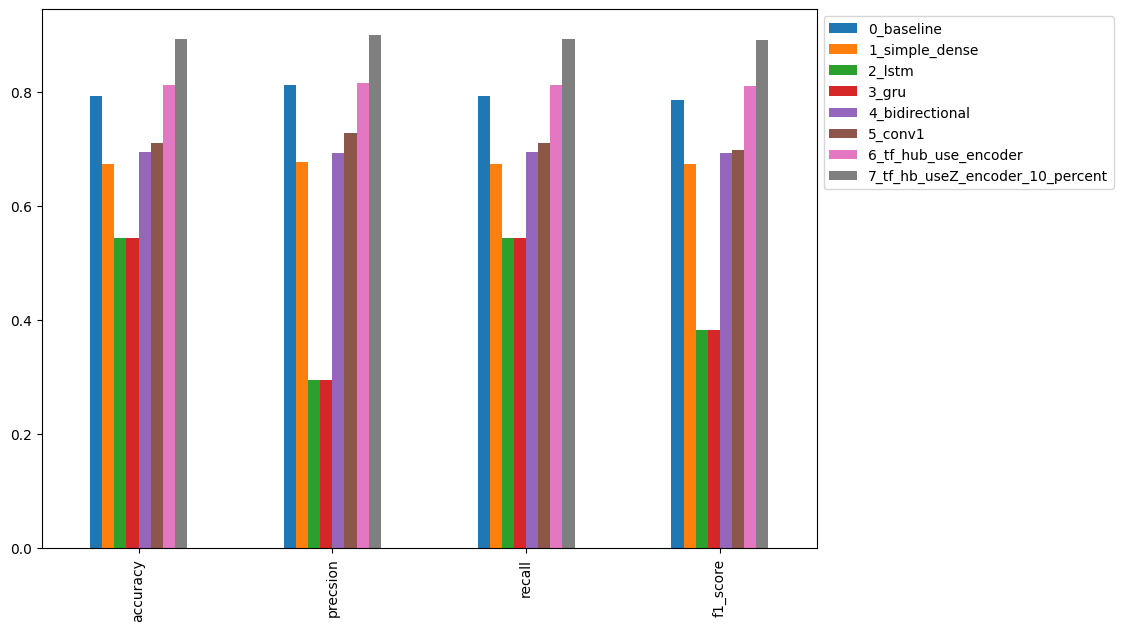

In [105]:
all_model_results.plot(kind='bar',figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

# **The Speed/Score Tradeoff**

In [108]:
import time

def pred_time(model, samples):
    start_time = time.perf_counter()
    _ = model.predict(samples)
    end_time = time.perf_counter()

    total_time = end_time - start_time
    time_per_pred = total_time / len(samples)

    return total_time, time_per_pred



In [109]:
model_6_pred_time,model_6_time_per_pred=pred_time(model=model_6,samples=val_sentances)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [111]:
baseline_total_pred_time,baselin_time_per_pred=pred_time(model=model_0,samples=val_sentances)

In [114]:
baseline_total_pred_time,baselin_time_per_pred

(0.017937774999609246, 2.354038713859481e-05)